# Final Project Submission

* Student name:  Natalya Doris
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


## Data Inspection and Initial Cleaning

### Import Data & Necessary Packages

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, ShuffleSplit
from datetime import datetime

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


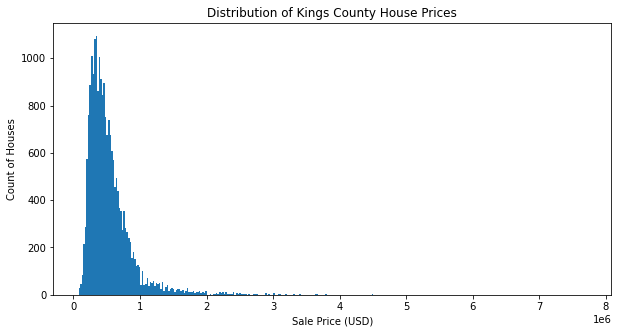

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['price'], bins='auto')

ax.set_xlabel("Sale Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Kings County House Prices");

Taking the log makes this data much more normal. Will keep that in mind for later.

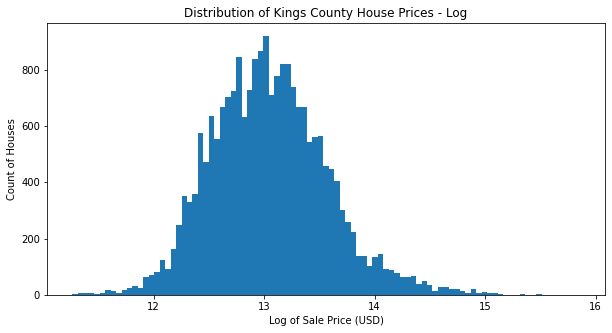

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(np.log(df['price']), bins='auto')

ax.set_xlabel("Log of Sale Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Kings County House Prices - Log");

In [116]:
y = df['price']
X = df.drop(['price'], axis=1)

### Handling Missing Values

In [6]:
X.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
print(len(df[df["waterfront"].isna()]))
print(len(df[df["view"].isna()]))
print(len(df[df["yr_renovated"].isna()]))
print(" ")
print(len(df[df["yr_renovated"]==0])) 
print(len(df[df["view"]=='NONE']))
print(" ")
print(len(df[df["waterfront"].isna() & (df["view"]=='NONE')])) # houses with waterfront as NA don't have view
print(len(df[df["view"].isna() | (df["view"]=='NONE')]))

2376
63
3842
 
17011
19422
 
2110
19485


In [8]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [10]:
X['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

While there aren't many missing values, a significant number of houses have no view, are not waterfront, or have a 0 value for year renovated. I am inclined not to include these variables in the model as very few houses are impacted by these metrics. Nonetheless, I will perform some feature engineering so that I can see how they impact the model.

In [117]:
X['yr_renovated'][X['yr_renovated'] == 0] = 'NA'
X['yr_renovated'][X['yr_renovated'].isna()] = 'NA'
print(set(X['yr_renovated']))

#[f(x) if condition else g(x) for x in sequence]
X['renovated'] = [False if house=='NA' else True for house in X['yr_renovated']]
sum(X['renovated'])

{1934.0, 1940.0, 1944.0, 1945.0, 1946.0, 1948.0, 1950.0, 1951.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1962.0, 1963.0, 'NA', 1964.0, 1965.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0}


/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_19115/1131518255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['yr_renovated'][X['yr_renovated'] == 0] = 'NA'


744

In [118]:
X['view'][X['view'].isna()] = 'NA'
set(X['view'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_19115/670772084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['view'][X['view'].isna()] = 'NA'


{'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NA', 'NONE'}

In [119]:
X['waterfront'][X['waterfront'].isna()] = 'NA'
X['waterfront'].value_counts()

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_19115/808933529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['waterfront'][X['waterfront'].isna()] = 'NA'


NO     19075
NA      2376
YES      146
Name: waterfront, dtype: int64

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  object 
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

### Convert some categoricals into more useable format 

In [121]:
print(X['date'][0])

X['date'] = [datetime.strptime(date, '%m/%d/%Y') for date in X['date']]
X['yr_sold'] = pd.DatetimeIndex(X['date']).year
X['mth_sold'] = pd.DatetimeIndex(X['date']).month

X.head()

10/13/2014


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,yr_sold,mth_sold
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NA,NONE,Average,...,1955,NA,98178,47.5112,-122.257,1340,5650,False,2014,10
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,2014,12
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NA,98028,47.7379,-122.233,2720,8062,False,2015,2
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,NA,98136,47.5208,-122.393,1360,5000,False,2014,12
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,NA,98074,47.6168,-122.045,1800,7503,False,2015,2


In [122]:
# grade
X['grade'] = [int(grade.split(" ")[0]) for grade in X['grade']]
set(X['grade'])

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [103]:
set(X['condition']) # need to get rid of space in very good

{'Average', 'Fair', 'Good', 'Poor', 'Very Good'}

In [123]:
X['condition'][X['condition']=='Very Good'] = 'VeryGood'
set(X['condition'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_19115/3950577358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['condition'][X['condition']=='Very Good'] = 'VeryGood'


{'Average', 'Fair', 'Good', 'Poor', 'VeryGood'}

In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  object        
 15  zipcode        2159

## Baseline Model

### Check Correlations

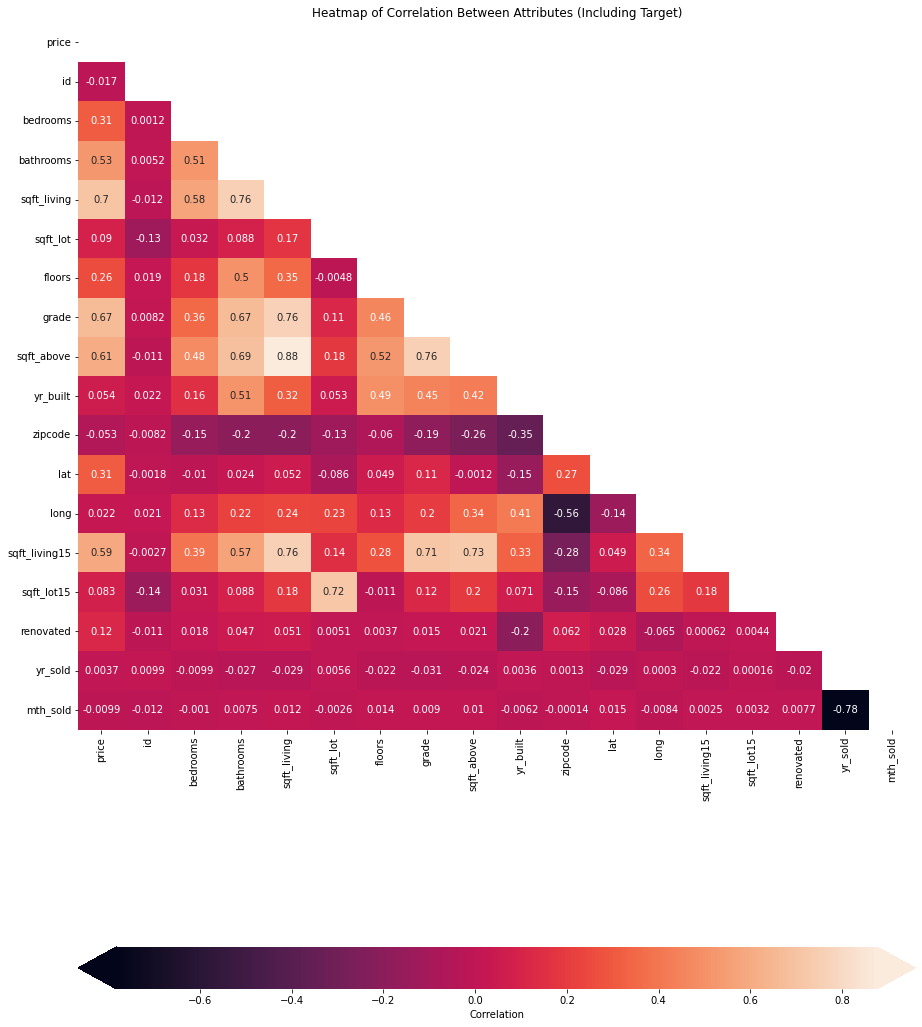

In [16]:
# Create a df with the target as the first column, then compute the correlation matrix
heatmap_data = pd.concat([y, X], axis=1)
corr = heatmap_data.corr()

# Plot a heatmap of the correlation matrix, with both numbers and colors indicating the correlations
fig, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax,
    annot=True, cbar_kws={"label": "Correlation", "orientation": "horizontal", 
                          "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

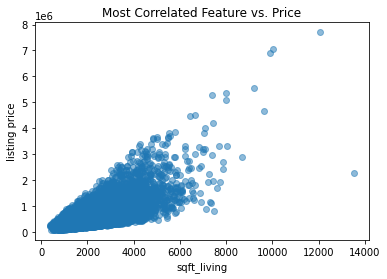

In [17]:
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()

ax.scatter(X[most_correlated_feature], y, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

# I suspect a log transformation will improve the linearity

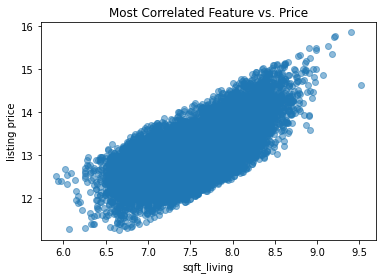

In [20]:
fig, ax = plt.subplots()

ax.scatter(np.log(X[most_correlated_feature]), np.log(y), alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

# very linear after log transformation

### Build Baseline Model With Most Correlated Feature as Independent Variable

In [125]:
outcome = 'price'
data_ols = pd.concat([X, y], axis=1)
predictors = 'sqft_living'
formula = outcome + '~' + predictors

base_model = ols(formula=formula, data=data_ols).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:24:48   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Base Model Assumptions

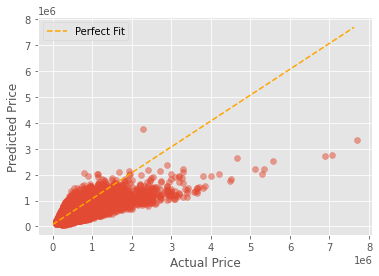

In [126]:
# Linearity check

preds = base_model.predict(X_base)
fig, ax = plt.subplots()

perfect_line = np.arange(y.min(), y.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

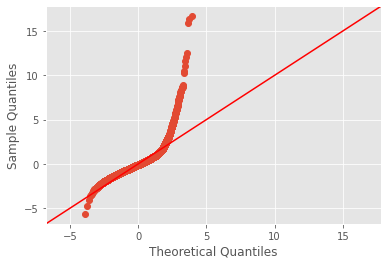

In [107]:
# Normality check

residuals = (y - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [108]:
# JB test for normality (also shown in model summary)
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(base_model.resid)
list(zip(name, test))

[('Jarque-Bera', 542662.604395781),
 ('Prob', 0.0),
 ('Skew', 2.8196584324835365),
 ('Kurtosis', 26.90063410219435)]

We have a JB value = ~543,000, indicating that errors are not normally distributed. The p-value of 0.0 also favors rejecting the normality null hypothesis at the 5% significance level. Additionally, the kurtosis is above 3, which indicates heavier tails than a normal distribution. The skewness value also shows that underlying data is heavily skewed.

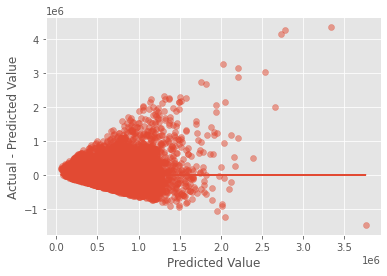

In [109]:
# Homoscedasticity check

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_base))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [110]:
# Run Goldfeld Quandt test for homoscedasticity check

lwr_thresh = data_ols.sqft_living.quantile(q=.45)
upr_thresh = data_ols.sqft_living.quantile(q=.55)
middle_10percent_indices = data_ols[(data_ols.sqft_living >= lwr_thresh) 
                                    & (data_ols.sqft_living<=upr_thresh)].index
indices = [x-1 for x in data_ols.index if x not in middle_10percent_indices]

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(base_model.resid.iloc[indices], base_model.model.exog[indices])
list(zip(name, test))

[('F statistic', 0.9159859051813802), ('p-value', 0.9999921364751672)]

While this relatively large F statistic suggests heteroscedasticity, we cannot confirm this result via the GQ test given the p-value > 0.05. A cone-like shape as seen in the graph above, however, shows obvious heteroscedasticity, in my opinion.

This baseline model fails all of our assumption checks. Let's see if we can improve the next one..

### Preprocess Data and Check Model Assumptions

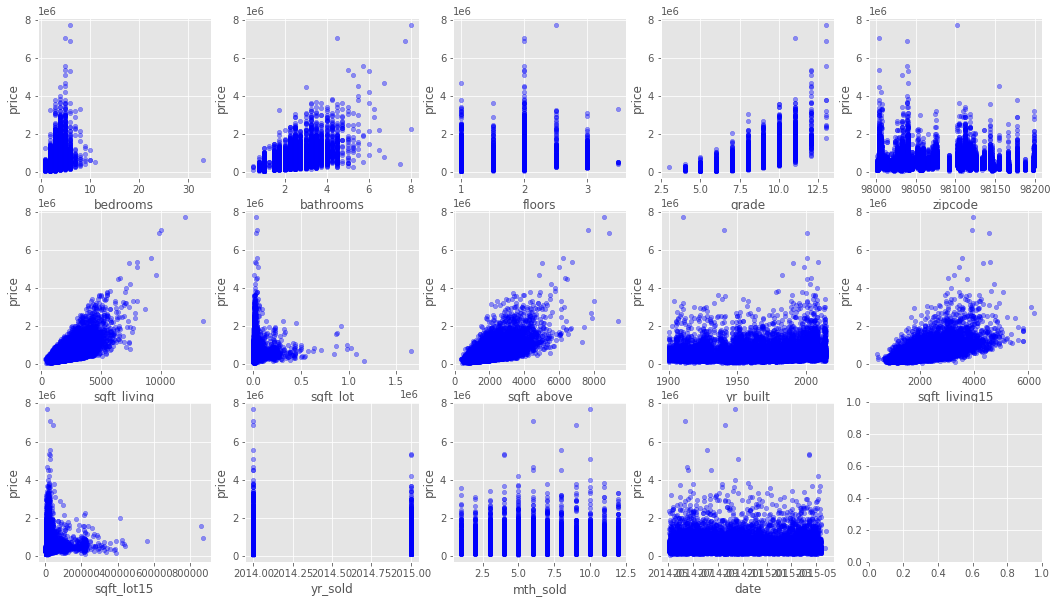

In [79]:
# visually inspecting relationships between numerical variables and price

cols = ['bedrooms', # number of bedrooms
        'bathrooms', # number of bathrooms
        'floors', # number of floors (levels) in the house
        'grade', # Overall grade of the house. Related to the construction and design of the house
        'zipcode', #  zip code
        'sqft_living', # sq. ft. of living space
        'sqft_lot', # Square footage of the lot
        'sqft_above', # Square footage of house apart from basement
        'yr_built', # year house was built
        'sqft_living15', # sq. ft. of interior housing living space for the nearest 15 neighbors
        'sqft_lot15', # sq. ft. of the land lots of the nearest 15 neighbors
        'yr_sold', # year house was sold
        'mth_sold', # month house was sold
        'date'
       ]

data = pd.concat([X, y], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18,10))
axe = axes.ravel()

for xcol, ax in zip(cols, axe):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Going to exclude yr renovated / renovated (~17,000 rows had 0 as a value and several thousand more were NaNs), latitude and longitude (as we can use zip code to represent location/neighborhood), and year sold since the data set only contains houses sold in 2 years (2014 and 2015).

Obvious categoricals are floors & month sold. I'd like to treat zip code as a categorical as well since this is not really a linear relationship but it is possible that certain zip codes have a high avg price

In [26]:
len(set(df['zipcode'])) # this will be categorical

70

In [127]:
relevant_columns = ['bedrooms', # number of bedrooms
                    'bathrooms', # number of bathrooms
                    'floors', # number of floors (levels) in the house
                    'waterfront', # whether the house is on the waterfront
                    'view', # quality of view from house
                    'condition', # How good the overall condition of the house is;
                                 # Related to maintenance of house.
                    'grade', # Overall grade of the house. Related to the construction and design of the house
                    'zipcode', #  zip code
                    'sqft_living', # sq. ft. of living space
                    'sqft_lot', # Square footage of the lot
                    'sqft_above', # Square footage of house apart from basement
                    'yr_built', # year house was built
                    'sqft_living15', # sq. ft. of interior housing living space for the nearest 15 neighbors
                    'sqft_lot15', # sq. ft. of the land lots of the nearest 15 neighbors
                    'mth_sold', # month house was sold
                    'date', # date house was sold
                    'lat',
                    'renovated'
                   ]
                    
categoricals = ['waterfront', 'mth_sold', 'view', 'condition', 'zipcode', 'waterfront']
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'date', 'grade', 
              'yr_built', 'sqft_living15', 'sqft_lot15', 'floors', 'lat', 'renovated']

X = X[relevant_columns]
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,mth_sold,date,lat,renovated
0,3,1.00,1.0,NA,NONE,Average,7,98178,1180,5650,1180,1955,1340,5650,10,2014-10-13,47.5112,False
1,3,2.25,2.0,NO,NONE,Average,7,98125,2570,7242,2170,1951,1690,7639,12,2014-12-09,47.7210,True
2,2,1.00,1.0,NO,NONE,Average,6,98028,770,10000,770,1933,2720,8062,2,2015-02-25,47.7379,False
3,4,3.00,1.0,NO,NONE,VeryGood,7,98136,1960,5000,1050,1965,1360,5000,12,2014-12-09,47.5208,False
4,3,2.00,1.0,NO,NONE,Average,8,98074,1680,8080,1680,1987,1800,7503,2,2015-02-18,47.6168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,NO,NONE,Average,8,98103,1530,1131,1530,2009,1530,1509,5,2014-05-21,47.6993,False
21593,4,2.50,2.0,NO,NONE,Average,8,98146,2310,5813,2310,2014,1830,7200,2,2015-02-23,47.5107,False
21594,2,0.75,2.0,NO,NONE,Average,7,98144,1020,1350,1020,2009,1020,2007,6,2014-06-23,47.5944,False
21595,3,2.50,2.0,NA,NONE,Average,8,98027,1600,2388,1600,2004,1410,1287,1,2015-01-16,47.5345,False


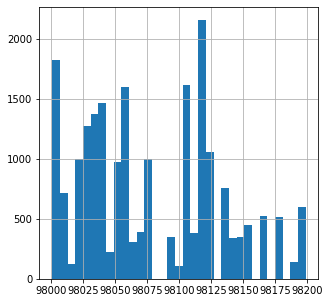

In [23]:
X['zipcode'].hist(figsize=[5, 5], bins='auto');

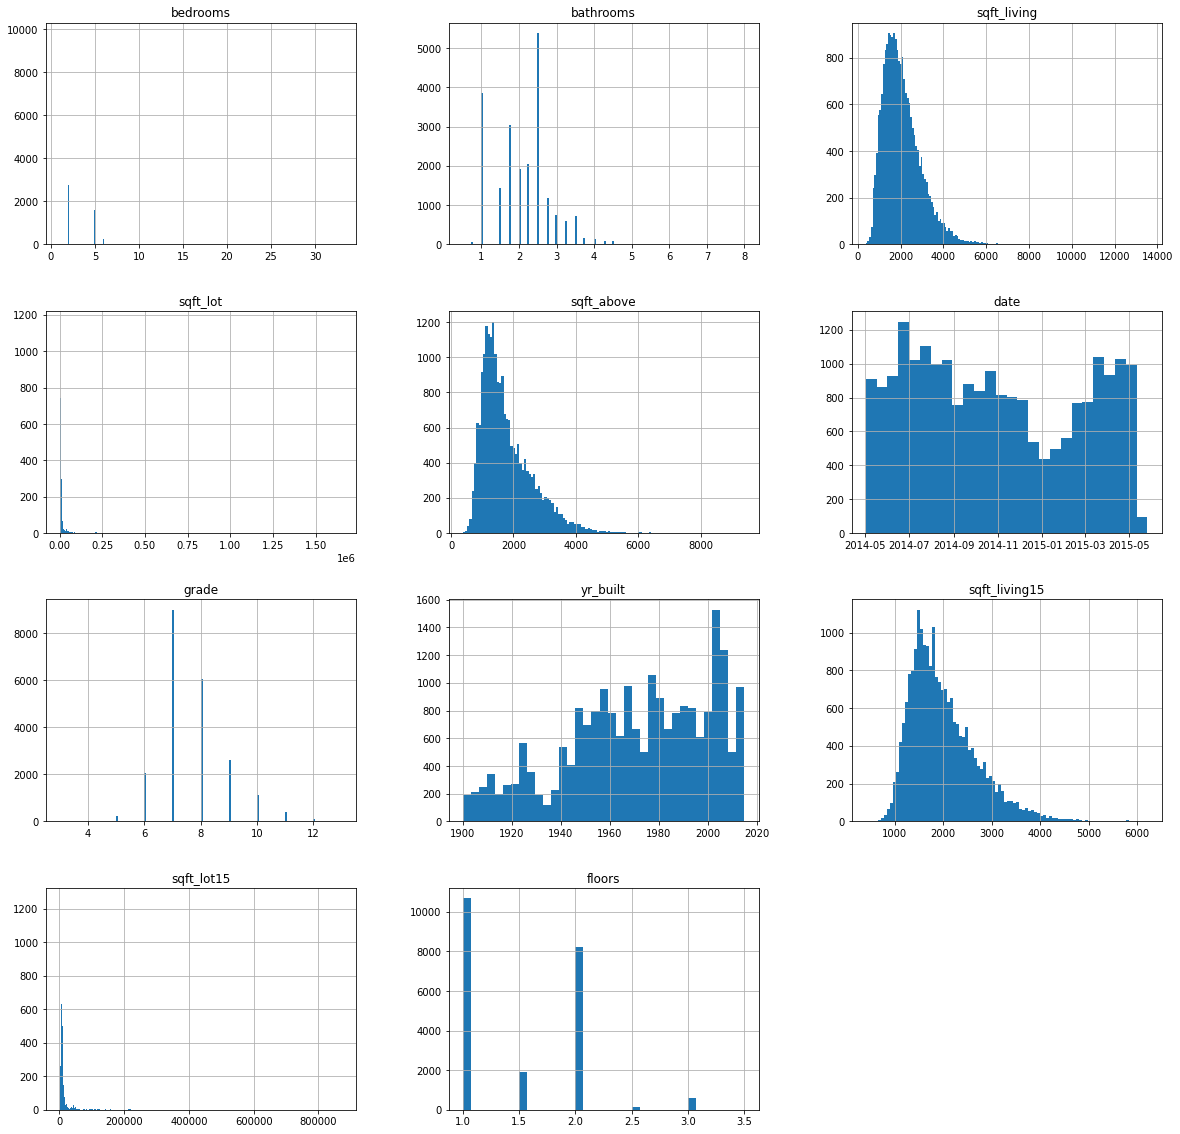

In [29]:
X[continuous].hist(figsize=[20, 20], bins='auto');

### Check for Multicollinearity

In [128]:
abs(X[continuous].corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,grade,yr_built,sqft_living15,sqft_lot15,floors,lat,renovated
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,True,True,False,True,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,True,True,False,False,False,False,False,False
grade,False,False,True,False,True,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,False,False
sqft_living15,False,False,True,False,False,False,False,True,False,False,False,False
sqft_lot15,False,False,False,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,False,False,False,False,False,True,False,False


In [129]:
df_corr=X[continuous].corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) 
# in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#d rop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated 
# with variables other than themselves
df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc<0.99)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758


### Categoricals

In [130]:
## I want to use condition, waterfront, view and zipcode
## should waterfront and view be binary variables?

# one hot encode categoricals

categoricals = ['grade', 'condition', 'bedrooms', 'bathrooms', 'floors', 
                'waterfront', 'mth_sold', 'view', 'zipcode']
dummy_cat = ['condition', 'waterfront', 'view']

df_ohe = pd.get_dummies(X[dummy_cat], prefix=dummy_cat, drop_first=True)

#floors_dummies = pd.get_dummies(X_train['floors'], prefix='floors', drop_first=True)
#bedrooms_dummies = pd.get_dummies(X_train['bedrooms'], prefix='beds', drop_first=True)

zipcode_dummies = pd.get_dummies(X['zipcode'], prefix='zip', drop_first=True)

In [ ]:
#join categorical and continuous dataframes together, drop original columns
X_preprocessed = X.drop(categoricals, axis=1)
X_preprocessed = pd.concat([X_preprocessed, df_ohe, zipcode_dummies], axis=1) #df_cont?

X_preprocessed

#X_preprocessed = pd.concat([df_log_norm, df_ohe, condition_dummies, #floors_dummies, bedrooms_dummies, 
#                                  zipcode_dummies, X[other_continuous]], axis=1)


In [134]:
cont = ['sqft_living', 'sqft_lot','bedrooms', 'renovated', 'lat', 'floors']
X_preprocessed = pd.concat([X[cont], df_ohe, zipcode_dummies], axis=1) #df_cont?

X_preprocessed

,sqft_living,sqft_lot,bedrooms,renovated,lat,floors,condition_Fair,condition_Good,condition_Poor,condition_VeryGood,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180,5650,3,False,47.5112,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2570,7242,3,True,47.7210,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,770,10000,2,False,47.7379,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,4,False,47.5208,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1680,8080,3,False,47.6168,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,3,False,47.6993,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,2310,5813,4,False,47.5107,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,1020,1350,2,False,47.5944,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,1600,2388,3,False,47.5345,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Taking log of dependent variable

In [133]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

y_log = pd.DataFrame(np.log(y))
y_norm = y_log.apply(normalize)

### !!Check model assumptions before log transformations!!

### Continuous Variables - Transformations 

In [ ]:
## SHOULD FLOORS AND BEDROOMS BE CONTINUOUS? PROBABLY
## VERY SIMILAR R SQUARED SO PROBABLY NOT WORTH TRANSFORMATION
## ALSO NEED TO FIX COLUMN NAMES - NO SPACES, NO PERIODS FOR SM OLS EVAL

In [85]:
log_cols = ['sqft_living', 'sqft_lot']
other_continuous = ['floors', 'bedrooms']
categoricals = ['grade', 'condition', 'bedrooms', 'bathrooms', 'floors', 
                'waterfront', 'mth_sold', 'view', 'zipcode']
dummy_cat = ['condition', 'waterfront', 'view']

df_cont = X[log_cols]

# log features
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

y_log = pd.DataFrame(np.log(y))
y_norm = y_log.apply(normalize)

# one hot encode categoricals
#df_ohe = pd.get_dummies(X_train[dummy_cat], prefix=dummy_cat, drop_first=True)

#preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)

#X_train_new = preprocessed
#y = np.log(df['price'])

#X_train_new


#ames_preprocessed = df.drop(categoricals, axis=1)
#ames_preprocessed = pd.concat([ames_preprocessed, dummies], axis=1)
#ames_preprocessed.head()

In [135]:
X_preprocessed.columns

Index(['sqft_living', 'sqft_lot', 'bedrooms', 'renovated', 'lat', 'floors',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_VeryGood', 'waterfront_NO', 'waterfront_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NA', 'view_NONE',
       'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
    

### Checking again for multicollinearity

In [136]:
df_corr=X_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) 
# in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#d rop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc<0.99)]

,cc
pairs,


### Second Model

In [138]:
second_model = LinearRegression()
second_model.fit(X_preprocessed, y_norm)

print("Second Model R^2: ", second_model.score(X_preprocessed, y_norm))

Second Model R^2:  0.8507253987556183


In [139]:
## NEED TO FIX COLUMN NAMES FOR THIS TO WORK

outcome = 'price'
data_ols = pd.concat([y_norm, X_preprocessed], axis=1)
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

second_model = ols(formula=formula, data=data_ols).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1425.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:35:03   Log-Likelihood:                -10106.
No. Observations:               21597   AIC:                         2.039e+04
Df Residuals:                   21510   BIC:                         2.108e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -62.0478      7.211     -8.604      0.000     -76.182     -47.913
renovated[T.True]      0.1162      0.015      7.895      0.000       0.087       0.145
sqft_living            0.0006    4.3e-06    136.502      0.000       0.001       0.001
sqft_lot            1.328e-06   7.01e-08     18.943      0.000    1.19e-06    1.47e-06
bedrooms              -0.0172      0.004     -4.801      0.000      -0.024      -0.010
lat                    1.2690      0.152      8.326      0.000       0.970       1.568
floors                 0.0778      0.006     13.290      0.000       0.066       0.089
condition_Fair        -0.3368      0.030    -11.175      0.000      -0.396      -0.278
condition_Good         0.0518      0.007      7.867      0.000       0.039       0.065
condition_Poor        -0.6614      0.072     -9.153      0.000      -0.803      -0.520
condition_VeryGood     0.1562      0.010     15.059      0.000       0.136       0.177
waterfront_NO          0.0064      0.008      0.754      0.451      -0.010       0.023
waterfront_YES         0.7780      0.041     19.201      0.000       0.699       0.857
view_EXCELLENT         0.3792      0.030     12.851      0.000       0.321       0.437
view_FAIR              0.0044      0.025      0.177      0.860      -0.044       0.053
view_GOOD              0.1454      0.021      6.799      0.000       0.104       0.187
view_NA               -0.1693      0.050     -3.355      0.001      -0.268      -0.070
view_NONE             -0.2702      0.013    -20.328      0.000      -0.296      -0.244
zip_98002             -0.1342      0.034     -3.920      0.000      -0.201      -0.067
zip_98003              0.0588      0.031      1.905      0.057      -0.002       0.119
zip_98004              1.8489      0.056     33.242      0.000       1.740       1.958
zip_98005              1.1879      0.059     20.237      0.000       1.073       1.303
zip_98006              1.0328      0.047     22.152      0.000       0.941       1.124
zip_98007              0.9642      0.060     16.072      0.000       0.847       1.082
zip_98008              0.8928      0.056     16.018      0.000       0.784       1.002
zip_98010              0.4265      0.044      9.685      0.000       0.340       0.513
zip_98011              0.3430      0.076      4.502      0.000       0.194       0.492
zip_98014              0.0666      0.069      0.970      0.332      -0.068       0.201
zip_98019              0.0685      0.074      0.927      0.354      -0.076       0.213
zip_98022              0.1912      0.036      5.296      0.000       0.120       0.262
zip_98023             -0.0076      0.027     -0.286      0.775      -0.060       0.045
zip_98024              0.4796      0.061      7.802      0.000       0.359       0.600
zip_98027              0.7535      0.0

JB Results [('Jarque-Bera', 12219.640108604624), ('Prob', 0.0), ('Skew', -0.42791564545788147), ('Kurtosis', 6.5842456261834315)]


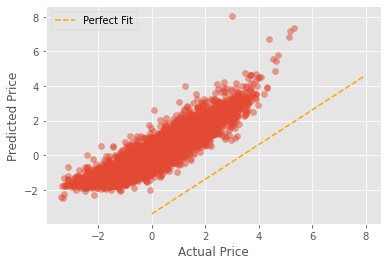

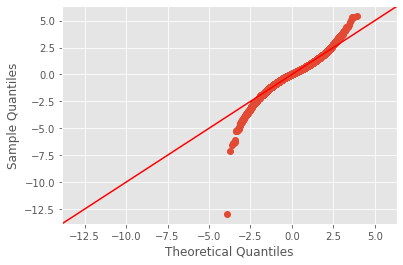

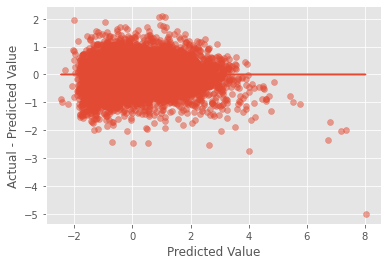

In [170]:
# Linearity check

model = second_model
X_model = X_preprocessed
y_model = y_norm['price']

preds = model.predict(X_model)
fig, ax = plt.subplots()

perfect_line = np.arange(y_model.min(), y_model.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_model, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

# Normality of residuals check

residuals = (y_model - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

# JB test
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print("JB Results", list(zip(name, test)))

# Homoscedasticity check

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_model))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# multicollinearity

#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif = [variance_inflation_factor(X_model.values, i) for i in range(X_model.shape[1])]
#pd.Series(vif, index=X_model.columns, name="Variance Inflation Factor")

In [167]:
y_norm['price']

0       -1.401998
1        0.279938
2       -1.799430
3        0.499698
4        0.178434
           ...   
21592   -0.483049
21593   -0.282955
21594   -0.273005
21595   -0.282955
21596   -0.677290
Name: price, Length: 21597, dtype: float64

best features = log(sqft_living), not going to use interactions since we care about interpretability of coefficients

### Final Model

In [ ]:
## UNCOMMENT ONCE FINAL MODEL IS FINISHED

In [ ]:
#final_model = LinearRegression()
#final_model.fit(X_final, y_norm)

#print("Final Model R^2: ", final_model.score(X_train_final, y_norm))

## Checking Final Model Assumptions

In [ ]:
# Linearity

X_final = X_preprocessed # add when finished
y_final = y_norm

preds = second_model.predict(X_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_final.min(), y_final.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_final, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [ ]:
# Normality of Residuals

import scipy.stats as stats

residuals = (y_final - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [ ]:
# Independence (would be train)

X_final = X_train_preprocessed

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
pd.Series(vif, index=X_final.columns, name="Variance Inflation Factor") # looking for below 5

In [ ]:
# Homoscedasticity

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_final))]) # would be test
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## Appendix - Extra

### Train test split for future model validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

condition = X_train[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(condition)

# Inspect the categories of the fitted encoder
ohe.categories_

condition_encoded = ohe.transform(condition)

# (5a) Make the transformed data into a dataframe
condition_encoded = pd.DataFrame(
    # Pass in NumPy array
    condition_encoded,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

X_train.drop("condition", axis=1, inplace=True)

X_train = pd.concat([X_train, condition_encoded], axis=1)
X_train


### Transforming Test Set

In [ ]:
# only keep relevant columns
X_test = X_test.loc[:, relevant_columns]

#continuous = ['sqft_living', 'sqft_lot']
#categoricals = ['grade', 'condition', 'bedrooms', 'bathrooms', 'floors', 
#                'waterfront', 'mth_sold', 'view', 'zipcode']
#dummy_cat = ['condition', 'waterfront', 'view']

df_cont = X_test[continuous]

# take the log of continuous variables
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

# take log and normalize y
y_log_test = pd.DataFrame(np.log(y_test))
y_norm_test = y_log_test.apply(normalize)


# categoricals
df_ohe = pd.get_dummies(X_test[dummy_cat], prefix=dummy_cat, drop_first=True)

floors_dummies = pd.get_dummies(X_test['floors'], prefix='floors', drop_first=True)
bedrooms_dummies = pd.get_dummies(X_test['bedrooms'], prefix='beds', drop_first=True)
zipcode_dummies = pd.get_dummies(X_test['zipcode'], prefix='zip', drop_first=True)

# join categorical and continuous dataframes together, drop original columns
X_test_preprocessed = pd.concat([df_log_norm, df_ohe, floors_dummies, 
                                 bedrooms_dummies, zipcode_dummies], axis=1)

These are the R^2 values of the train and test models using a linear regression with square footage of the living room as the independent variable and listing price as the dependent variable. We get similar R^2s for each, around 0.5, which  is a good sign that the model is predicting the test data correctly, but is a fairly low R^2 for an inferential model as currently it only explains around 50% of the variation in house price.

In [24]:
# scores using cross validation with 10 splits

X_base = X_train[[most_correlated_feature]]

base_model = LinearRegression()
base_model.fit(X_base, y_train)

splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=base_model,
    X=X_base,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

NameError: name 'X_train' is not defined

In [ ]:
# scores using single test/train split

base_model.fit(X_base, y_train)

print("Train R^2: ", str(base_model.score(X_base, y_train)))
print("Test R^2: ", base_model.score(X_test[[most_correlated_feature]], y_test))

In [18]:
X_base = X[[most_correlated_feature]]
base_model = LinearRegression()
base_model.fit(X_base, y)
print("BASE R^2: ", str(base_model.score(X_base, y)))

BASE R^2:  0.49268789904035093


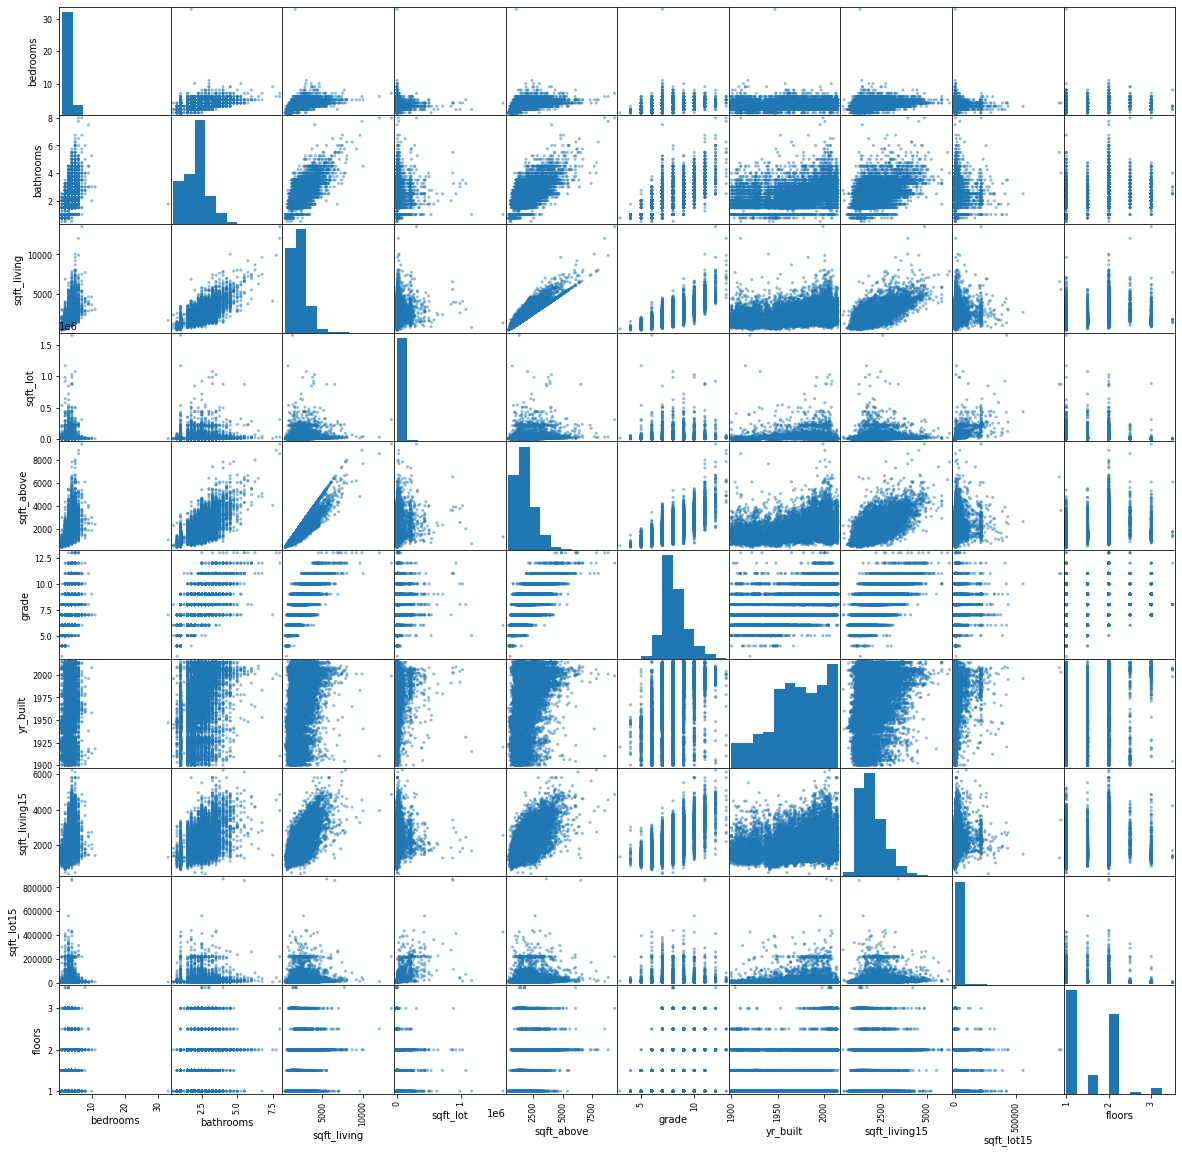

In [32]:
pd.plotting.scatter_matrix(X[continuous], figsize=(20,20));

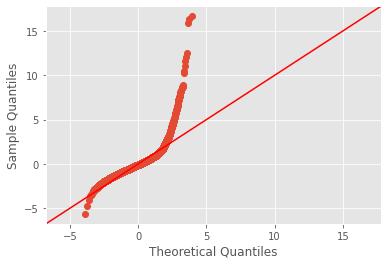

In [52]:
f = 'price~sqft_living'
#f2 = 'sales~radio'
model = smf.ols(formula=f, data=data_ols).fit()
#model2 = smf.ols(formula=f2, data=data).fit()

resid1 = model.resid
#resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
#fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

In [84]:
# Linearity

X_final = X_preprocessed # add when finished
y_final = y

preds = second_model.predict(X_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_final.min(), y_final.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_final, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

NameError: name 'second_model' is not defined

In [ ]:
# log transform continuous variables where it makes sense

# log cols
cols_log = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

df_transf = pd.DataFrame([])

for feat in cols_log:
    df_transf[feat] = X[feat].map(lambda x: np.log(x))
    
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = df_transf.apply(normalize)

features_final.hist(figsize  = [20, 20], bins='auto')